### Exploratory Data Analysis (EDA)

In [46]:
import pandas as pd
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix


In [47]:
df = pd.read_csv('C:/Users/deyna/Desktop/Master Applied IT/Semester-1/FedML/code/fl-project/data/financial_data.csv')

In [48]:
df_synt = pd.read_csv("C:/Users/deyna/Downloads/Synthetic_Financial_datasets_log.csv")

In [49]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [50]:
df_synt

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [51]:
df.shape

(1048575, 10)

In [52]:
df_synt.shape

(6362620, 11)

In [53]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [54]:
df_synt.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrig    float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [17]:
df_synt.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [18]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740055e+05,8.938049e+05,9.781600e+05,1.114193e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971725e+06,3.008246e+06,2.296779e+06,2.416554e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00


In [19]:
df_synt.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [20]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [21]:
df_synt.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [22]:
# printing unique values counts for each column
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: count, Length: 95, dtype: int64
Unique values for column type
type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64
Unique values for column amount
amount
10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: count, Length: 1009606, dtype: int64
Unique values for column nameOrig
nameOrig
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: count, Length: 1048317, dtype: int64
Unique values for column oldbalanceOrig
oldbalanceOrig
0.00         342214
109.00     

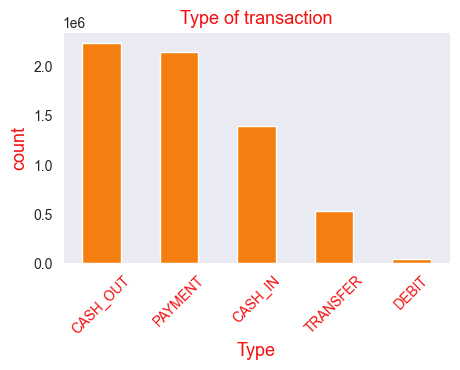

In [33]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (5,3))
df_synt['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 13)
plt.xticks(rotation = 45, color = '#F41010')
plt.xlabel('Type', fontsize = 13, color = '#F41010')
plt.ylabel('count', fontsize = 13, color = '#F41010')
plt.show()

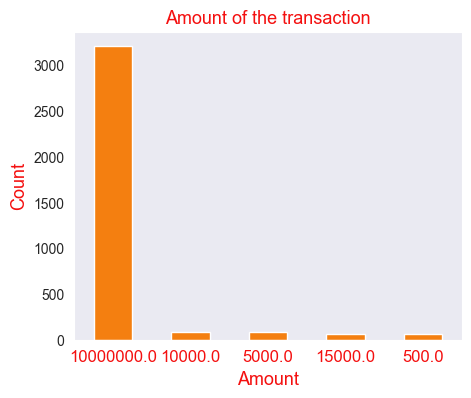

In [34]:
# Transaction amount
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (5,4))
df_synt['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',  color = '#F47F10')
plt.title("Amount of the transaction", fontsize = 13, color = "#F41010")
plt.xticks(rotation = 0, fontsize = 12, color = '#F41010')
plt.xlabel('Amount', fontsize = 13, color = '#F41010')
plt.ylabel('Count', fontsize = 13, color = '#F41010')
plt.show()

In [35]:
df_synt.groupby('type').count()['amount']

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: amount, dtype: int64

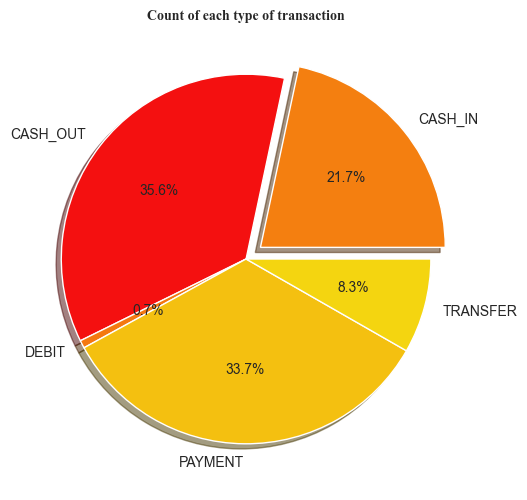

In [38]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], 
        shadow = True,explode = (0.1, 0, 0, 0, 0),
        textprops={'fontsize': 10})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 10, fontfamily = 'times new roman')
plt.show()

In [39]:
df_synt.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

- There is a fraud transaction present in CASH_OUT and TRANSFER
- CASH_OUT and TRANSFER types have relatively higher counts of fraudulent transactions compared to others, which could indicate that these types are more vulnerable to fraudulent activities.
- The presence of fraudulent transactions in certain types highlights the challenges in fraud detection and prevention, especially in high-risk transaction types like CASH_OUT and TRANSFER.

### Finding Correlation

In [40]:
# selecting the columns of numerical type
numeric_columns = df_synt.select_dtypes(include=['int', 'float']).columns
numeric_data = df_synt[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

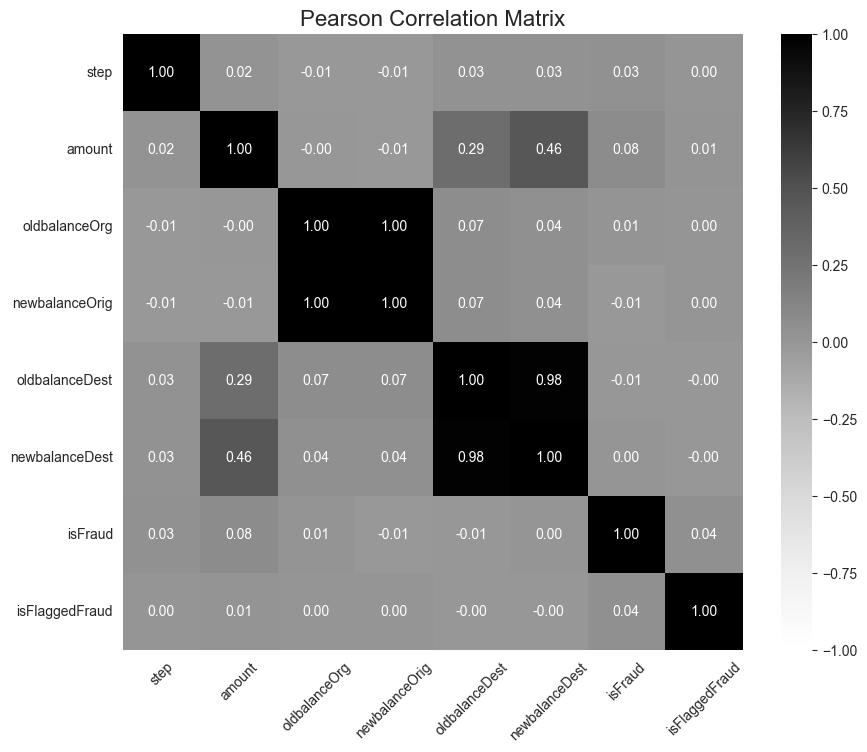

In [41]:
# visulaising the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [42]:
# Removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
df_synt.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [43]:
# nameDest and nameOrig can also be removed
df_synt.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [44]:
# printing the data frame after removing the columns
df_synt.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [45]:
# encoding the categorical column into numerical data
le = LabelEncoder()
df_synt['type'] = le.fit_transform(df_synt['type'])